In [401]:
import pandas as pd
from random import *
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy.stats import norm, t
from statistics  import *

# Load the Excel file into a Pandas dataframe
df = pd.read_excel('./wage.xlsx', sheet_name="wage")
sample_size = 30
id = 241

rannum = np.random.RandomState(id)
sample = df.sample(n=sample_size,random_state=rannum)

sample.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,smsa66,wage,enroll,KWW,IQ,married,libcrd14,exper,lwage,expersq
313,520,0,1,9,25,12.0,11.0,410536,1,0,...,1,556,0,30.0,NaN,1.0,1.0,10,6.320768,100
914,1582,0,0,12,31,NaN,NaN,139912,0,0,...,1,800,0,37.0,95.0,4.0,0.0,13,6.684612,169
1007,1724,1,0,16,24,12.0,12.0,337974,1,0,...,0,385,0,39.0,106.0,1.0,1.0,2,5.953243,4
2359,4079,0,1,12,34,8.0,8.0,321797,1,0,...,1,577,0,41.0,99.0,1.0,1.0,16,6.357842,256
1281,2180,0,1,12,28,8.0,12.0,89240,1,0,...,1,588,0,25.0,104.0,1.0,1.0,10,6.376727,100


In [402]:
#1.	Choose a simple random sample with size of 30 from the population. What is the probability that there are six black ones.
from scipy.stats import binom

total_object = df.shape[0]
black_prop = np.sum(df['black'] == 1) / total_object
result_1 = binom.pmf(6, sample_size, black_prop)

print("Result of question 1: ", result_1)


Result of question 1:  0.16274260339991206


In [403]:
#2.	Choose 5 people in your subsample randomly. Find the probability that there is at least one black.
black_prop = np.sum(sample['black'] == 1) / sample_size
result_2 = 1 - (1-black_prop)**5

print("Result of question 2: ", result_2)

Result of question 2:  0.598122427983539


In [404]:
# 3.	Suppose that the proportion of blacks in the population equals the proportion of backs in your subsample. 
# a.	How many blacks do you expect in your subsample?
# b.	How many blacks are in the data?
black_prop = np.sum(df['black'] == 1) / total_object
print("The proportion of blacks in the population: ", black_prop)

print("Number of black expected in the sample: ", black_prop*sample_size)
print("True number of black in the sample data: ", np.sum(sample['black'] == 1))

The proportion of blacks in the population:  0.2335548172757475
Number of black expected in the sample:  7.0066445182724255
True number of black in the sample data:  5


In [405]:
#4.	Suppose that number of education (educ) is a discrete random variable that has a Poisson distribution such that its mean equals to the sample mean in your subsample. If we randomly choose a person, what is the probability that he/she has 6 years in education?
educ_6_prop = np.sum(df['educ'] == 6) / total_object
mean = 30* educ_6_prop

print("Population mean due to educ property(also sample mean): ", mean)
k = 1
# Posson Distribution to calculate result
# Mean equal to lambda
result_4 = (mean**k) * e**(-mean) / factorial(k)
print("Result of question 4: ", result_4)

Population mean due to educ property(also sample mean):  0.159468438538206
Result of question 4:  0.13596229254626138


Mean of the age:  29.0
Variance of the age:  10.0
Mean of the age in subsample:  28.066666666666666
Mean of the age in subsample:  11.581609195402299


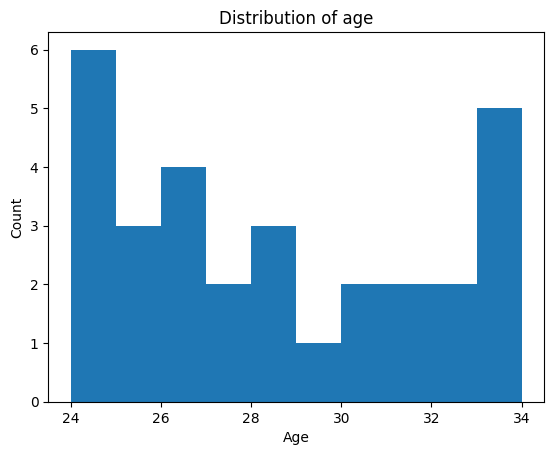

Conclusion: It is not Uniform Distribution


In [406]:
#5.	Assume age is an integer-valued discrete uniform random variable, 24 ≤ age ≤ 34. Find the mean and the variance of age. Compare these corresponding values to the values in your subsample. Create the bar chart for age. Is age a uniform distribution?

# Assume discrete uniform random variable
a, b = 24, 34
print("Mean of the age: ", (a + b)/2)
print("Variance of the age: ", ((b-a+1)**2-1)/12)

# Compare to my subsample
print("Mean of the age in subsample: ", sample['age'].sum()/sample_size)
# Compare to my subsample
print("Mean of the age in subsample: ", sample['age'].std()**2)


# Create histogram on age property
plt.hist(sample['age'])
# Add element
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of age')
# Print a bar chart
plt.show()

# Conclusion
print("Conclusion: It is not Uniform Distribution")


In [407]:
# 6. Suppose that lwage is a normally distributed random variable with mean μ = 6.26 and standard deviation σ = 0.44. Find the probability P(5 < lwage < 6).

mu = 6.26
sigma = 0.44

# N(6.26,0.44) -> N(0,1)
result_6 = norm.cdf(6,mu,sigma) - norm.cdf(5,mu,sigma)
print("Result of question 6: ", result_6)

Result of question 6:  0.27519662472729256


In [408]:
# 7.
# a. For your random sample of n = 20 observations. Find the probability that the sample mean of IQ lies in [100, 110].
# b. How large must the random sample be if we want the standard error of the sample mean to be 1?

# Calculate population mean and standard deviation
mean = df['IQ'].mean()
std_dev = df['IQ'].std()

Z1 = (100-mean)/(std_dev/sqrt(20))
Z2 = (110-mean)/(std_dev/sqrt(20))

result_7a = norm.cdf(Z2,0,1) - norm.cdf(Z1,0,1)
print("Result of question 7a: ", result_7a)

std_error = 1
result_7b = std_dev**2/std_error
print("Result of question 7b: ", result_7b)


Result of question 7a:  0.7469548646387064
Result of question 7b:  237.8922584474499


In [409]:
#8. Calculate the statistics for wage, IQ, educ and exper.
# We have a sample with size 30 so now we will calculate this sample statistic(sample mean, sample variance and sample standard deviation)
# for wage, IQ, educ and exper

print("For wage property")
print("Sample mean: ", sample['wage'].mean())
print("Sample variance: ", sample['wage'].std()**2)
print("Sample standard deviation: ", sample['wage'].std())


print("For IQ property")
print("Sample mean: ", sample['IQ'].mean())
print("Sample variance: ", sample['IQ'].std()**2)
print("Sample standard deviation: ", sample['IQ'].std())

print("For educ property")
print("Sample mean: ", sample['educ'].mean())
print("Sample variance: ", sample['educ'].std()**2)
print("Sample standard deviation: ", sample['educ'].std())

print("For exper property")
print("Sample mean: ", sample['exper'].mean())
print("Sample variance: ", sample['exper'].std()**2)
print("Sample standard deviation: ", sample['exper'].std())


For wage property
Sample mean:  536.5
Sample variance:  43201.15517241379
Sample standard deviation:  207.84887580262202
For IQ property
Sample mean:  100.84
Sample variance:  283.5566666666666
Sample standard deviation:  16.8391409123704
For educ property
Sample mean:  13.4
Sample variance:  5.558620689655173
Sample standard deviation:  2.3576727274274463
For exper property
Sample mean:  8.666666666666666
Sample variance:  14.712643678160916
Sample standard deviation:  3.8357064118830726


In [410]:
#9 


In [411]:
#10. Suppose that lwage is a normally distributed random variable with standard deviation σ = 0.44. Construct a 95% confidence interval on the true mean lwage using data in your subsample.
lwage_sample_mean = sample['lwage'].mean()

# 95% construct CI -> alpha = 0.05
alpha = 0.05
z_alpha_half = norm.ppf(1-alpha/2)

lower_CI = lwage_sample_mean - z_alpha_half*(0.44/sqrt(30))
higher_CI = lwage_sample_mean + z_alpha_half*(0.44/sqrt(30))
print("Result of question 10: ", lower_CI, " < μ < ", higher_CI)


Result of question 10:  6.069885700814316  < μ <  6.384783870108535


In [412]:
#11. Construct a 96% confidence interval on the true mean IQ using data in the subsample. Assume that IQ is a normally distributed random variable.

alpha = 0.04
IQ_sample_mean = sample['IQ'].mean()
z_alpha_half = norm.ppf(1-alpha/2)
s = sample['IQ'].std()

lower_CI = IQ_sample_mean - z_alpha_half*(s/sqrt(30))
higher_CI = IQ_sample_mean + z_alpha_half*(s/sqrt(30))

print("Result of question 11: ", lower_CI, " < μ < ", higher_CI)

Result of question 11:  94.52596987089942  < μ <  107.15403012910059


In [413]:
#12. If we want the error in estimating the mean lwage from the two-size confidence interval to be 0.2 at 95% confidence. What sample size should be used? Assume that lwage is a normally distributed random variable with standard deviation σ = 0.44.

alpha = 0.05
E = 0.2
z_alpha_half = norm.ppf(1-alpha/2)

result_12 = (z_alpha_half*0.44/E)**2

print("Result of question 12: ", result_12)

Result of question 12:  18.59266069215956


In [414]:
#13. Calculate a 99% confidence interval on the true proportion of all people who near 4-year college (nearc4).
nearc4_sample_count = np.sum(sample['nearc4'] == 1)
nearc4_sample_prop = nearc4_sample_count / 30
alpha = 0.01
z_alpha_half = norm.ppf(1-alpha/2)

nearc4_lower_CI = nearc4_sample_prop - z_alpha_half * sqrt( (nearc4_sample_prop*(1-nearc4_sample_prop)) / 30 )
nearc4_higher_CI = nearc4_sample_prop + z_alpha_half * sqrt( (nearc4_sample_prop*(1-nearc4_sample_prop)) / 30 )

print("Result of question 13: ", nearc4_lower_CI, " < p < ", nearc4_higher_CI)

Result of question 13:  0.4449745778818235  < p <  0.8883587554515098


In [415]:
#14. If we want the error in estimating the proportion of blacks from two-size confidence interval to be 0.01 at 99% confidence. What sample size should be used?

alpha = 0.01
E = 0.01
z_alpha_half = z_alpha_half = norm.ppf(1-alpha/2)

black_prop = np.sum(sample['black'] == 1) / 30

result_14 = ((z_alpha_half/E)**2)*black_prop*(1-black_prop)
print("Result of question 14: ", result_14)


Result of question 14:  9215.134168085018


In [416]:
#15. Use your subsample to test the hypothesis H0: mean(IQ) = 100 against H1: mean(IQ) ≠ 100 at  . Assume that IQ is a normally distributed random variable with standard deviation σ = 15.

IQ_sample_mean = sample['IQ'].mean()

z0 = (IQ_sample_mean - 100)/(15/sqrt(30))
alpha = 0.02
z_alpha_half = norm.ppf(1-alpha/2)

if( z0 < -z_alpha_half or z0 > z_alpha_half ):
    print("Reject H0")
else:
    print("Fail to reject H0")


Fail to reject H0


In [417]:
#16. Use your subsample to test the hypothesis H0: mean(lwage) = 6 against H1: mean(lwage) > 6 at  . Assume that lwage is a normally distributed random variable.
lwage_sample_mean = sample['lwage'].mean()

lwage_sample_std = sample['lwage'].std()

t0 = (lwage_sample_mean-6)/(lwage_sample_std/sqrt(30))
alpha = 0.1
t_alpha = t.ppf(1-alpha,29)

if( t0 > t_alpha ):
    print("Reject H0")
else:
    print("Fail to reject H0")


Reject H0


In [418]:
#17. It is argued that the proportion of people with less than 10 years of work experience is not more than 0.07. Use the given data to test this argument at.
p0 = 0.07
alpha = 0.02

num = np.sum(sample['exper'] < 10)
z0 = (num-p0*30)/(sqrt(30*p0*(1-p0)))
z_alpha = norm.ppf(1-alpha)

if( z0 < -z_alpha ):
    print("Reject H0")
else:
    print("Failed to reject H0")


Failed to reject H0


In [419]:
# 18.	Assume that the variables are normally distributed and the variance within each population be equal for all populations. 
# a.	Test the difference between the averages wage by variable black at 1% significance level based on the subsample.
# b.	Test the difference between two independent population proportions that people with low IQ (IQ < 90) by variable black at 5% significance level based on the data.
# c.	Test the difference between the variances lwage by variable black at 1% significance level based on the subsample.

# A
print("A:")
wage_sample_mean = sample['wage'].mean()
black_sample_mean = sample['black'].mean()

wage_sample_var = sample['wage'].std()**2
black_sample_var = sample['black'].std()**2

alpha = 0.01
z_alpha = norm.ppf(1-alpha)
# delta_0 = 0
z0 = (wage_sample_mean-black_sample_mean-0)/sqrt(wage_sample_var/30+black_sample_var/30)
if( z0 > z_alpha ):
    print("Reject H0")
else:
    print("Failed to reject H0")

# B
print("B: ")
IQ_sample_mean = sample['IQ'].mean()

IQ_sample_var = sample['IQ'].std()**2
alpha = 0.05
z_alpha = norm.ppf(1-alpha)

z0 = (IQ_sample_mean-black_sample_mean-0)/sqrt(IQ_sample_var/30+black_sample_var/30)
if( z0 > z_alpha ):
    print("Reject H0")
else:
    print("Failed to reject H0")





A
Reject H0
